## Ted's Analysis

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import statsmodels
from matplotlib.ticker import ScalarFormatter
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, ShuffleSplit
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

###  I've been having issues with the test data not matching up with the train data, and after mucho mucho trial and error, I've been able to determine that there is one single entry in the entire 22000 listed that has a "grade" of "3 Poor".  When samples are split into train and test sets, one gets the single, the other does not.  This results is mismatched columns/rows at the end of the process, which was super frustrating, but easy to fix here:

In [7]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
df = df[df['grade'] != "3 Poor"]

In [9]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

####  Now that that one is gone, we can proceed without too much problem hopefully:

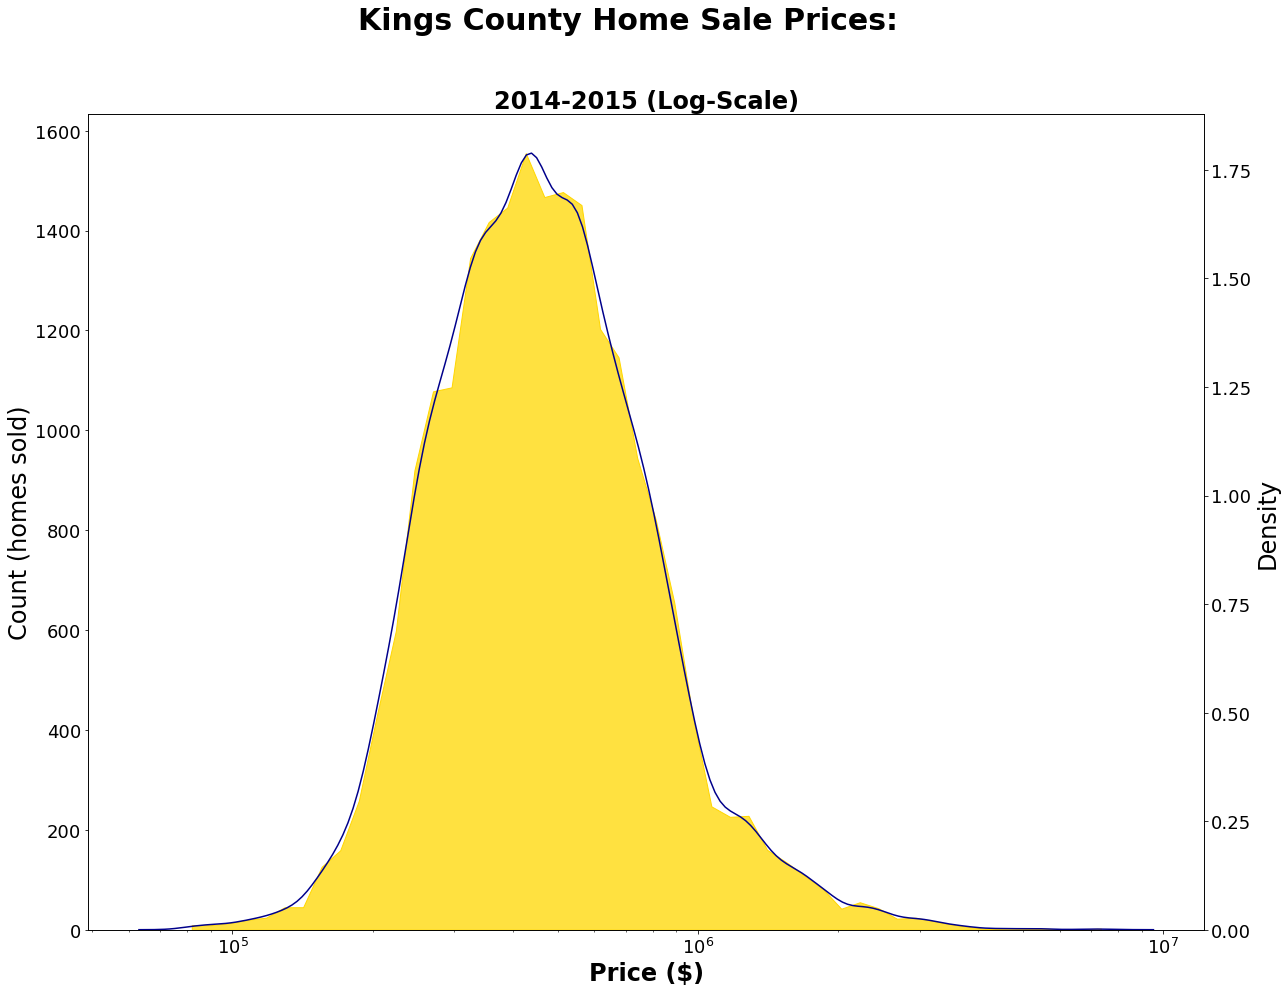

In [24]:
x=df['price']
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle('Kings County Home Sale Prices:', fontsize=30, fontweight='bold')
sns.histplot(x, ax=ax, bins=50, color="gold", log_scale=True, element='poly')
plt.xlabel('Price ($)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=18)
plt.ylabel('Count (homes sold)', fontsize=24)
plt.yticks(fontsize=18)
ax2 = ax.twinx()
sns.kdeplot(x, ax=ax2, color="darkblue", log_scale=True)
plt.title('2014-2015 (Log-Scale)', fontsize=24, fontweight='bold')
plt.yticks(fontsize=18)
plt.ylabel('Density', fontsize=24)
plt.savefig('Home_Sale_Prices');

# The prediction target is price

In [ ]:
y = df['price']
X = df.drop('price',axis=1)

In [ ]:
##  sklearn model_selection train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [ ]:
print(f"X_train is a DataFram with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

In [ ]:
print(f"X_test is a DataFram with {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_test is a Series with {y_test.shape[0]} values")

In [ ]:
##  sklearn linear_model LinearRegression:  Should fail at this point and it does, so it is
##    commented out.  This includes ALL, non-converted data, so it needs lots of cleaning

model = LinearRegression()
# model.fit(X_train, y_train)

In [ ]:
X_train

###  Converting the sell date ("date") to a sortable integer

In [ ]:
# ##  Change date format, but keep, in case we want to use it later

date_num = []
for date in X_train['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_train['date_num'] = date_num

#### Dropping the sell date so a regression can still be performed

In [ ]:
###  Date and other columns to drop(lat and long) - not useful for this analysis
lat_long = ['lat','long','date']
X_train = X_train.drop(lat_long, axis=1)
X_train

In [ ]:
X_train.info()

In [ ]:
X_train['waterfront'].value_counts()

In [ ]:
X_train.isna().sum()

Since there are 1822 listing with "waterfront" missing, but less than 1% of listed homes have a waterfront access, these seem like infrequent enough cases that we will fill in the waterfront NaNs with "NO" instead

In [ ]:
X_train['waterfront'] = X_train['waterfront'].fillna("NO")

In [ ]:
X_train.isna().sum()

Doing the same thing with the "view column now:

In [ ]:
X_train['view'].value_counts()

We will go with the mode of this to replace the 49 missing values, as this is the likely case.

In [ ]:
X_train['view'] = X_train['view'].fillna("NONE")

In [ ]:
X_train.isna().sum()

In [ ]:
X_train['yr_renovated'].value_counts()

#### Very few homes from this list have been renovated.  The 0 values may have never been renovated, but we can't know that for sure.  Since there are so many 0s and so many missing entries, the column itself needs to be dropped.  If we want to add it back later, we'll have to address these issues.

In [ ]:
X_train = X_train.drop('yr_renovated', axis=1)
X_train

In [ ]:
X_train.isna().sum()

In [ ]:
X_train.info()

In [ ]:
X_train['sqft_basement'].value_counts()

#### There are many 0 values, which likely means no basement.  I am going to make an assumption that the ? values have no basements, so I will change those to 0.  We can worry about the inclusion of the basement ft$^2$ later

In [ ]:
basement_train = X_train[["sqft_basement"]]
missing_indicator = MissingIndicator("?")
missing_indicator.fit(basement_train)
basement_missing_train = missing_indicator.transform(basement_train)
basement_missing_train

In [ ]:
X_train["basement_?"] = basement_missing_train

In [ ]:
zero = float(0)
X_train = X_train.replace("?",int(zero))
X_train.head()

In [ ]:
X_train['sqft_basement'] = pd.to_numeric(X_train['sqft_basement'], downcast="float")

In [ ]:
X_train['sqft_basement'] = X_train['sqft_basement'].astype(float)

In [ ]:
X_train.head()

In [ ]:
# Modeling still doesn't work, need to deal with the other categorical problems

#model.fit(X_train, y_train)

In [ ]:
X_train.info()

In [ ]:
print(X_train['waterfront'].value_counts())
print()
print(X_train['view'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())


### Binary Category:  Waterfront

In [ ]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]

In [ ]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_train

In [ ]:
X_train['waterfront'] = waterfront_encoded_train
X_train

In [ ]:
X_train.info()

In [ ]:
encoder_basement_missing = OrdinalEncoder()
encoder_basement_missing.fit(basement_missing_train)
encoder_basement_missing.categories_[0]

In [ ]:
basement_missing_encoded_train = encoder_basement_missing.transform(basement_missing_train)
basement_missing_encoded_train = basement_missing_encoded_train.flatten()
basement_missing_encoded_train

In [ ]:
X_train['basement_?'] = basement_missing_encoded_train
X_train

In [ ]:
X_train.info()

###  Now it's time for the multiple category fixes:  VIEW

In [ ]:
## One Hot Encoder

view_train = X_train[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_train)
ohe.categories_

In [ ]:
view_encoded_train = ohe.transform(view_train)
view_encoded_train

In [ ]:
view_encoded_train = pd.DataFrame(view_encoded_train, columns=ohe.categories_[0], index=X_train.index)
view_encoded_train

In [ ]:
X_train.drop("view", axis=1, inplace=True)
X_train

In [ ]:
X_train = pd.concat([X_train, view_encoded_train],axis=1)
X_train

In [ ]:
X_train.info()

### CONDITION:

In [ ]:
condition_train = X_train[['condition']]
ohe.fit(condition_train)
ohe.categories_

In [ ]:
condition_encoded_train = ohe.transform(condition_train)
condition_encoded_train = pd.DataFrame(condition_encoded_train, columns=ohe.categories_[0],index=X_train.index)
condition_encoded_train

In [ ]:
X_train.drop('condition', axis=1, inplace=True)
X_train

In [ ]:
X_train = pd.concat([X_train, condition_encoded_train], axis=1)
X_train

In [ ]:
X_train.info()

###  Last one, GRADE

In [ ]:
grade_train = X_train[['grade']]
ohe.fit(grade_train)
ohe.categories_

In [ ]:
grade_encoded_train = ohe.transform(grade_train)
grade_encoded_train

In [ ]:
grade_encoded_train = pd.DataFrame(grade_encoded_train, columns=ohe.categories_[0], index=X_train.index)
grade_encoded_train

In [ ]:
X_train.drop("grade", axis=1, inplace=True)
X_train

In [ ]:
X_train = pd.concat([X_train, grade_encoded_train], axis=1)
X_train

In [ ]:
X_train.info()

# FINALLY DONE!! with cleaning anyways....

In [ ]:
model.fit(X_train, y_train)

In [ ]:
cross_val_score(model, X_train, y_train, cv=3)

## Run Test data now too, just to see

In [ ]:
date_num = []
for date in X_test['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_test['date_num'] = date_num

lat_long = ['lat','long','date']
X_test = X_test.drop(lat_long, axis=1)

X_test['waterfront'] = X_test['waterfront'].fillna("NO")
X_test['view'] = X_test['view'].fillna("NONE")

X_test = X_test.drop('yr_renovated', axis=1)

basement_test = X_test[["sqft_basement"]]
missing_indicator.fit(basement_test)
basement_missing_test = missing_indicator.transform(basement_test)

X_test["basement_?"] = basement_missing_test
zero = float(0)
X_test = X_test.replace("?",int(zero))
X_test['sqft_basement'] = pd.to_numeric(X_test['sqft_basement'], downcast="float")
X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)

waterfront_test = X_test[['waterfront']]
encoder_waterfront.fit(waterfront_test)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test['waterfront'] = waterfront_encoded_test

encoder_basement_missing.fit(basement_missing_test)
basement_missing_encoded_test = encoder_basement_missing.transform(basement_missing_test)
basement_missing_encoded_test = basement_missing_encoded_test.flatten()
X_test['basement_?'] = basement_missing_encoded_test

view_test = X_test[['view']]
ohe.fit(view_test)
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(view_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test],axis=1)

condition_test = X_test[['condition']]
ohe.fit(condition_test)
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(condition_encoded_test, columns=ohe.categories_[0],index=X_test.index)
X_test.drop('condition', axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

grade_test = X_test[['grade']]
ohe.fit(grade_test)
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(grade_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)



In [ ]:
X_test

In [ ]:
X_test.describe()

In [ ]:
X_test.info()

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(X_train.corr().abs(), annot=True);

# Here it is: the first Model Fit!

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
full_comp = pd.concat([X_train, y_train], axis=1)
full_comp = full_comp[['price'] + [col for col in full_comp.columns if col != 'price']]

In [ ]:
full_comp_test = pd.concat([X_test, y_test], axis=1)
full_comp_test = full_comp_test[['price'] + [col for col in full_comp_test.columns if col != 'price']]

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp.corr().abs(), annot=True)
# plt.savefig('Allcomparison.png', dpi=600);

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp_test.corr().abs(), annot=True)
# plt.savefig('Allcomparison_test.png', dpi=600);

In [ ]:
full_rename = full_comp.copy()

In [ ]:
full_test_rename = full_comp_test.copy()

In [ ]:
column_names = {
    "AVERAGE" : "View_Avg",
    "EXCELLENT" : "View_Exc",
    "FAIR" : "View_Fair",
    "GOOD" : "View_Good",
    "NONE" : "View_N/A",
    "Average" : "Cond_Avg",
    "Fair" : "Cond_Fair",
    "Good" : "Cond_Good",
    "Poor" : "Cond_Poor",
    "Very Good" : "Cond_VGood",
    "10 Very Good" :  "Grade_VGood",
    "11 Excellent" :  "Grade_Exc",
    "12 Luxury" : "Grade_Lux",
    "13 Mansion" : "Grade_Mans",
    "4 Low" : "Grade_Low",
    "5 Fair" : "Grade_Fair",
    "6 Low Average" : "Grade_LAvg",
    "7 Average" : "Grade_Avg",
    "8 Good" : "Grade_Good",
    "9 Better" : "Grade_Better",    
}

In [ ]:
full_rename = full_rename.rename(column_names, axis=1)
full_test_rename = full_test_rename.rename(column_names, axis=1)

In [ ]:
drops = ["id", "sqft_lot", "zipcode", "date_num", "basement_?"]

In [ ]:
rename_drop = full_rename.drop(drops, axis=1).copy()
rename_test_drop = full_test_rename.drop(drops, axis=1).copy()

In [ ]:
rename_drop

In [ ]:
rename_test_drop

In [ ]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_comparison.png', dpi=600);

In [ ]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_test_comparison.png', dpi=600);

In [ ]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_drop.corr(), dtype=bool))
sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_comparison.png', dpi=600);

In [ ]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_test_drop.corr(), dtype=bool))
sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_test_comparison.png', dpi=600);

## Linear Regression Time!!

In [ ]:
most_corr_feat = 'sqft_above'
fig, ax = plt.subplots()

ax.scatter(rename_drop[most_corr_feat], y_train, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat], y=y_train)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat],y=y_train, color="black")
ax3.scatter(rename_drop[most_corr_feat], y_train, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_drop[most_corr_feat], y=y_train,
              scatter_kws={"s": 80});

In [ ]:
fig, ax = plt.subplots()

ax.scatter(rename_test_drop[most_corr_feat], y_test, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat], y=y_test)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat],y=y_test, color="black")
ax3.scatter(rename_test_drop[most_corr_feat], y_test, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear_test.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_test_drop[most_corr_feat], y=y_test,
              scatter_kws={"s": 80});

### "ShuffleSplit" cross validation scores using "Train" data

In [ ]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_corr_feat]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

### "ShuffleSplit" cross validation scores using "Test" data

In [ ]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_test[[most_corr_feat]],
    y=y_test,
    return_train_score=True,
    cv=splitter
)

print("Test score:     ", baseline_scores["test_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

###  OLS Regression of all variables - messy, complex, and not useful:

In [ ]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

##  Narrowing it down to a one or two at a time:

In [ ]:
formula = 'price ~ sqft_living'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

In [ ]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

In [ ]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_test_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

#  So I get best results, that I've been able to figure out, from price vs multivariate (sqft_living + Grade_Exc + Grade_Lux + View_Exc)  Best R2/AdjR2 I've found is 0.529 from the Training data, and 0.523 from the matching Test data. (all above)

In [ ]:
formula = 'price ~ Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

In [ ]:
formula = 'price ~ sqft_living15 + sqft_living + bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

##  Below, we see that sqft_living correlates strongly with bathrooms and sqft_above, so these three should probably not be used together

In [ ]:
formula = 'sqft_living ~ bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

In [ ]:
formula = 'sqft_living ~ View_Exc + Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline